In [18]:
import requests
import pandas as pd
from scipy.stats import ttest_ind

# URL der CSV-Datei
url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/wetter.csv'
    
def csv_download(url):
    # Lade die Datei herunter
    response = requests.get(url)

    # Überprüfe, ob der Download erfolgreich war
    if response.status_code == 200:
        # Speichern der Datei auf der Festplatte
        with open('wetterdaten.csv', 'wb') as file:
            file.write(response.content)
        print("Datei erfolgreich heruntergeladen und gespeichert.")

        # Lade die CSV-Datei in ein pandas DataFrame
        df_wetterdaten = pd.read_csv('wetterdaten.csv')

        # Zeige die ersten 5 Zeilen an
        # print(df_wetterdaten.head())

    else:
        print(f"Fehler beim Download. Status-Code: {response.status_code}")
        
    return df_wetterdaten


def durchschnittberechnen_spalte(wetterdaten, spaltenName):
    durchschnitt = wetterdaten[spaltenName].mean()
    return durchschnitt


df_wetterdaten = csv_download(url)

# Bestimmen der Durchschnittstemperatur des betrachteten Zeitraumes
temperaturDurchschnitt = durchschnittberechnen_spalte(df_wetterdaten, 'Temperatur')
print(f"Die Durchschnittstemperatur über den gesamten betrachteten Zeitraum beträgt: {temperaturDurchschnitt:.2f} °C")

# Bestimmen der Durchschnittstemperatur von 1.7. bis 31.7.
# Definiere den gewünschten Zeitraum
start_datum = '2012-07-01'
end_datum = '2012-07-31'
# Filtere die Zeilen, die in diesen Zeitraum fallen
df_juli = df_wetterdaten[(df_wetterdaten['Datum'] >= start_datum) & (df_wetterdaten['Datum'] <= end_datum)]
temperaturDurchschnitt_Zeitraum_Juli = durchschnittberechnen_spalte(df_juli, 'Temperatur')
print(f"Die Durchschnittstemperatur zwischen {start_datum} und {end_datum} beträgt: {temperaturDurchschnitt_Zeitraum_Juli:.2f} °C")


# Bestimmen der Durchschnittstemperatur von 1.5. bis 31.5.
# Definiere den gewünschten Zeitraum
start_datum = '2012-05-01'
end_datum = '2012-05-31'
# Filtere die Zeilen, die in diesen Zeitraum fallen
df_mai = df_wetterdaten[(df_wetterdaten['Datum'] >= start_datum) & (df_wetterdaten['Datum'] <= end_datum)]
temperaturDurchschnitt_Zeitraum_Mai = durchschnittberechnen_spalte(df_mai, 'Temperatur')
print(f"Die Durchschnittstemperatur zwischen {start_datum} und {end_datum} beträgt: {temperaturDurchschnitt_Zeitraum_Mai:.2f} °C")


# Berechne die Differenz der Durchschnittstemperaturen
differenz = temperaturDurchschnitt_Zeitraum_Juli - temperaturDurchschnitt_Zeitraum_Mai

# Interpretation
if differenz > 0:
    print(f"Die Durchschnittstemperatur im Juli ist um {differenz:.1f}K höher als im Mai.")
elif differenz < 0:
    print(f"Die Durchschnittstemperatur im Mai ist um {differenz:.1f}K höher als im Juli.")
else:
    print("Die Durchschnittstemperaturen im Mai und Juli sind gleich.")



    

Datei erfolgreich heruntergeladen und gespeichert.
Die Durchschnittstemperatur über den gesamten betrachteten Zeitraum beträgt: 12.10 °C
Die Durchschnittstemperatur zwischen 2012-07-01 und 2012-07-31 beträgt: 18.63 °C
Die Durchschnittstemperatur zwischen 2012-05-01 und 2012-05-31 beträgt: 15.13 °C
Die Durchschnittstemperatur im Juli ist um 3.5K höher als im Mai.


In [7]:
import pandas as pd

wetter_csv = pd.read_csv("wetterdaten.csv")
wetter_csv = pd.DataFrame(wetter_csv)
print(wetter_csv)

kiwo_data = pd.DataFrame(pd.read_csv("kiwo.csv"))
print(kiwo_data)

umsatzdaten_gekuerzt_data = pd.DataFrame(pd.read_csv("umsatzdaten_gekuerzt.csv"))
print(umsatzdaten_gekuerzt_data)

           Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0     2012-01-01         8.0      9.8250                   14        58.0
1     2012-01-02         7.0      7.4375                   12         NaN
2     2012-01-03         8.0      5.5375                   18        63.0
3     2012-01-04         4.0      5.6875                   19        80.0
4     2012-01-05         6.0      5.3000                   23        80.0
...          ...         ...         ...                  ...         ...
2596  2019-07-28         3.0     23.3500                   14         5.0
2597  2019-07-29         6.0     25.2500                    7        61.0
2598  2019-07-30         7.0     20.7375                    8        61.0
2599  2019-07-31         6.0     20.4500                    7        61.0
2600  2019-08-01         5.0     21.0625                    9        61.0

[2601 rows x 5 columns]
         Datum  KielerWoche
0   2012-06-16            1
1   2012-06-17            1
2  

Beschreibung des Warengruppe
1 Brot
2 Brötchen
3 Croissants
4 Konditorei
5 Kuchen
6 Saisonbrot


Berechnung der Mittelwerte, Standardabweichung und Stichprobengröße (mean_sales, std_sales, count_sales): 
Wir berechnen den Durchschnittsumsatz, die Standardabweichung und die Anzahl der Beobachtungen für jeden Wochentag.

Konfidenzintervall berechnen (h): 
Mit der scipy.stats.t.ppf-Funktion berechnen wir das 95%-Konfidenzintervall. Die Berechnung erfolgt mit der Formel:
$$h=t\cdot\frac{std}{\sqrt{count}}$$

wobei t der kritische Wert aus der t-Verteilung ist.

Visualisierung: 
Im Balkendiagramm wird das Konfidenzintervall als Fehlerbalken (yerr=h) hinzugefügt, wobei capsize=4 die Länge der Endkappen der Fehlerbalken steuert.
Der Code generiert ein Balkendiagramm, das den durchschnittlichen Umsatz pro Wochentag zeigt, wobei Konfidenzintervalle die Unsicherheit in den Durchschnittswerten darstellen.

Daten mit Wochentag:
       Datum  Warengruppe      Umsatz  Wochentag
0 2013-07-01            1  148.828353     Monday
1 2013-07-02            1  159.793757    Tuesday
2 2013-07-03            1  111.885594  Wednesday
3 2013-07-04            1  168.864941   Thursday
4 2013-07-05            1  171.280754     Friday

Durchschnittlicher Umsatz je Wochentag:
Wochentag
Friday      196.796023
Monday      193.688449
Saturday    241.319882
Sunday      246.495651
Thursday    193.232274
Name: Umsatz, dtype: float64

Konfidenzintervalle je Wochentag:
Wochentag
Friday      6.905577
Monday      6.872881
Saturday    8.961525
Sunday      9.560755
Thursday    7.068834
Name: Umsatz, dtype: float64

Durchschnittlicher Umsatz je Wochentag (sortiert):
Wochentag
Monday       193.688449
Tuesday      187.944440
Wednesday    187.477523
Thursday     193.232274
Friday       196.796023
Name: Umsatz, dtype: float64

Konfidenzintervalle je Wochentag (sortiert):
Wochentag
Monday       6.872881
Tuesday      6.769186


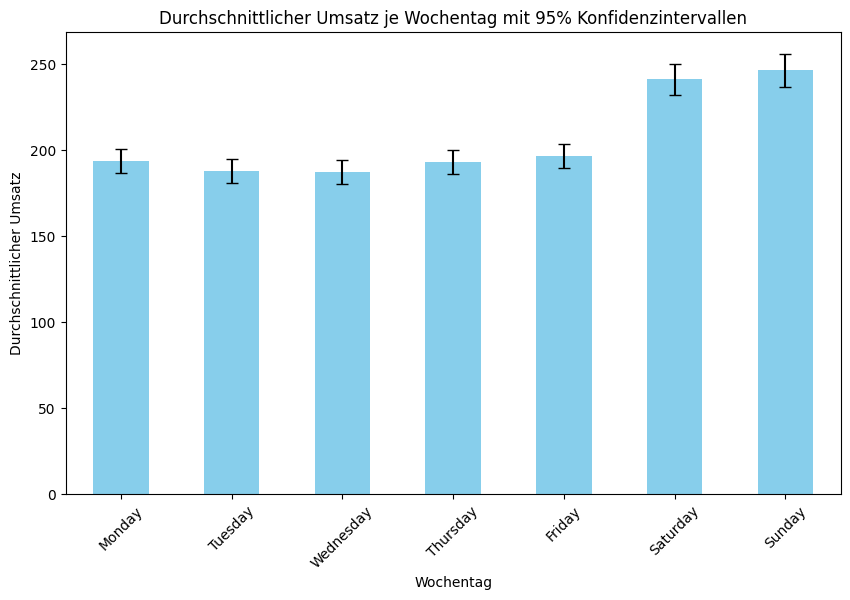

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Daten einlesen
umsatzdaten_gekuerzt_data = pd.read_csv('umsatzdaten_gekuerzt.csv', parse_dates=['Datum'])

# Wochentag hinzufügen
umsatzdaten_gekuerzt_data['Wochentag'] = umsatzdaten_gekuerzt_data['Datum'].dt.day_name()
print("Daten mit Wochentag:")
print(umsatzdaten_gekuerzt_data.head())

# Durchschnittlichen Umsatz, Standardabweichung und Stichprobengröße je Wochentag berechnen
grouped = umsatzdaten_gekuerzt_data.groupby('Wochentag')['Umsatz']
average_sales_per_day = grouped.mean()
std_sales = grouped.std()
count_sales = grouped.count()

# Konfidenzintervall (95%) berechnen
confidence = 0.95
h = stats.t.ppf((1 + confidence) / 2., count_sales - 1) * (std_sales / np.sqrt(count_sales))

# Ergebnisse anzeigen (ersten fünf Zeilen)
print("\nDurchschnittlicher Umsatz je Wochentag:")
print(average_sales_per_day.head())
print("\nKonfidenzintervalle je Wochentag:")
print(h.head())

# Reihenfolge der Wochentage sicherstellen (Montag bis Sonntag)
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
average_sales_per_day = average_sales_per_day.reindex(days_order)
h = h.reindex(days_order)

print("\nDurchschnittlicher Umsatz je Wochentag (sortiert):")
print(average_sales_per_day.head())
print("\nKonfidenzintervalle je Wochentag (sortiert):")
print(h.head())

# Balkendiagramm erstellen mit Konfidenzintervallen, geordnet nach Montag bis Sonntag
plt.figure(figsize=(10, 6))
average_sales_per_day.plot(kind='bar', yerr=h, color='skyblue', capsize=4)
plt.title('Durchschnittlicher Umsatz je Wochentag mit 95% Konfidenzintervallen')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittlicher Umsatz')
plt.xticks(rotation=45)
plt.show()




